# Assignment 4: Benchmarking Fashion-MNIST with ANN

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
"The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others." - **Zalando Research, Github Repo.**"

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![Here's an example how the data looks (each class takes three-rows):](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In this assignment, you will attempt to benchmarking the Fashion-MNIST using ANNs. You must use it to train some neural networks on TensorFlow and predict the final output of 10 classes. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (20 pts)

You can load the Fashion MNIST directly from Tensorflow using the folliwng code:
    tf.keras.datasets.fashion_mnist.load_data();

Write some code to load the data file and take a quick look at the dataset, and output the following:
- How big is your dataset? (regarding MB)
- How many entries does it have?
- How many features does it have?
- What are some basic statistics you can learn right away about this dataset?

**Large-scale Visualization:** Demonstrate that this dataset is indeed a complex and high dimensional worthy of an attempt on TensorFlow. Again, is there any non-linearly separation among the classes? Discover and plot out all features among the features.

In [1]:
# You might want to use the following package
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Your code goes here for this section.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data();


In [3]:
from sys import getsizeof

print('train image shape: ', train_images.shape)
print('train label shape: ', train_labels.shape)

print('test image shape: ', test_images.shape)
print('test label shape: ', test_labels.shape)
total_size = (train_images.nbytes/1024/1024) + (test_images.nbytes/1024/1024)
print('dataset size (MB): ',total_size)
print('number of entries: ',train_images.shape[0])
print('feature size: ', train_images.shape[1]*train_images.shape[2])

train image shape:  (60000, 28, 28)
train label shape:  (60000,)
test image shape:  (10000, 28, 28)
test label shape:  (10000,)
dataset size (MB):  52.337646484375
number of entries:  60000
feature size:  784


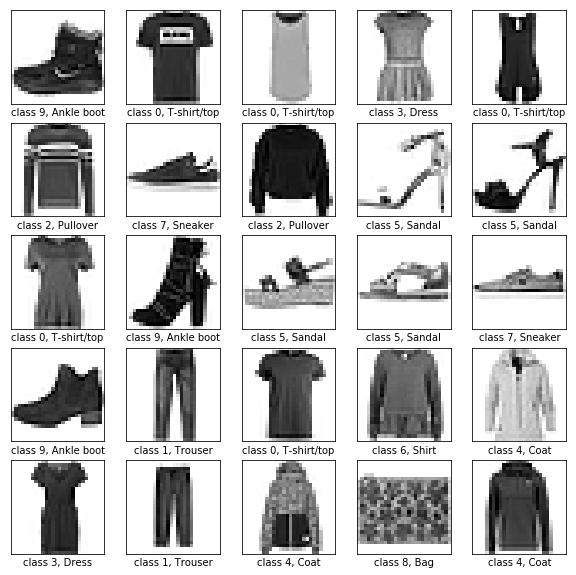

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel('class '+str(train_labels[i])+', '+ class_names[train_labels[i]])

In [4]:
#normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

- - -
## 2. CONSTRUCTION PHASE (25 pts)

Define at least three networks with different structures: Ensure the input layer has the right number of inputs. The best structure often is found through a process of trial and error experimentation:
- You may start with a fully connected network structure with two hidden layers.
- You may try a few activation functions to see if they affect the performance.
- You may use various optimizers to tweak the model parameters to minimize the cost function.

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [7]:
def build_network_1layers(n_hidden1=128, activation_func=tf.nn.relu):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(n_hidden1, activation=activation_func),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return model

def build_network_2layers(n_hidden1=128, n_hidden2=64, activation_func=tf.nn.relu):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(n_hidden1, activation=activation_func),
        keras.layers.Dense(n_hidden2, activation=activation_func),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return model

def build_network_3layers(n_hidden1=128, n_hidden2=64, n_hidden3=32, activation_func=tf.nn.relu):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(n_hidden1, activation=activation_func),
        keras.layers.Dense(n_hidden2, activation=activation_func),
        keras.layers.Dense(n_hidden3, activation=activation_func),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return model
    

- - -
## 3. EXECUTION PHASE (30 pts)

For each of the three models of your neural networks, open a TensorFlow session, define the number of epochs and size of the training batch (20 pts): For each model, you must compute the performance measures: Confusion Matrix and Class Accuracy.
- Which one yields the best performance measure for your dataset?
- You must be able to save the trained model and load it from disk to evaluate a test set


10000/10000 [==============================] - 1s 146us/step
Test accuracy: 0.8867


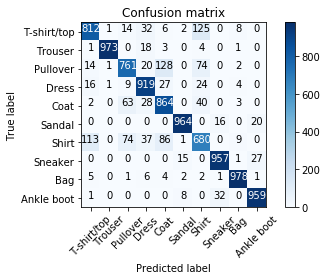

In [81]:
#execute network 1 (1 hidden layer)

n_epochs1 = 15
batch_size1 = 32
load_saved_weights = False #True if you want to load the saved weights

#try different optimizer functions
opt1 = tf.keras.optimizers.Adam(lr=0.001)
#opt1 = tf.keras.optimizers.SGD(lr=0.001)
#opt1 = tf.keras.optimizers.Adagrad(lr=0.001)

model1 = build_network_1layers(128, tf.nn.relu) #try different neurons and activation function

if load_saved_weights == True:
    model1.load_weights("saved_model1.h5")
    
    model1.compile(optimizer=opt1, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
else:
    model1.compile(optimizer=opt1, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model1.fit(train_images, train_labels, epochs=n_epochs1, batch_size=batch_size1)
    model1.save("saved_model1.h5")



test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

preds = np.argmax(model1.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, preds)
plot_confusion_matrix(cm, class_names)

print('Test accuracy:', test_acc1)

10000/10000 [==============================] - 2s 151us/step
Test accuracy: 0.8886


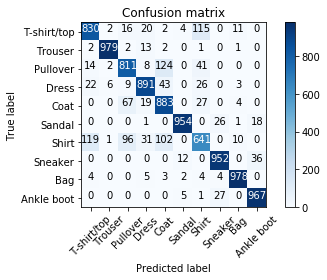

In [82]:
#execute network 2 (2 hidden layers)

n_epochs2 = 15
batch_size2 = 32
load_saved_weights = False #True if you want to load the saved weights

opt2= tf.keras.optimizers.Adam(lr=0.001)
#opt2= tf.keras.optimizers.SGD(lr=0.001)
#opt2= tf.keras.optimizers.Adagrad(lr=0.001)

model2 = build_network_2layers(128, 64, tf.nn.relu)
#model2 = build_network_2layers(128, 64, tf.nn.relu)
#model2 = build_network_2layers(128, 64, tf.nn.leaky_relu)
#model2 = build_network_2layers(128, 64, tf.nn.elu)

if load_saved_weights == True:
    model2.load_weights("saved_model2.h5")
    
    model2.compile(optimizer=opt2, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
else:
    model2.compile(optimizer=opt2, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model2.fit(train_images, train_labels, epochs=n_epochs2, batch_size=batch_size2)
    model2.save("saved_model2.h5")


test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

preds = np.argmax(model2.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, preds)
plot_confusion_matrix(cm, class_names)

print('Test accuracy:', test_acc2)

10000/10000 [==============================] - 2s 154us/step
Test accuracy: 0.882


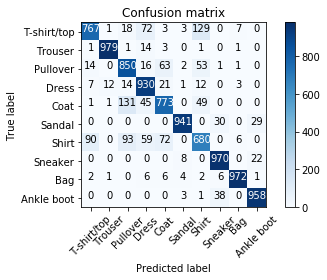

In [83]:
#execute network 3 (3 hidden layers)

n_epochs3 = 15
batch_size3 = 32
load_saved_weights = False #True if you want to load the saved weights

opt3 = tf.keras.optimizers.Adam(lr=0.001)
#opt3 = tf.keras.optimizers.SGD(lr=0.001)
#opt3 = tf.keras.optimizers.Adagrad(lr=0.001)

model3 = build_network_3layers(128,64,32, tf.nn.relu)

if load_saved_weights == True:
    model3.load_weights("saved_model3.h5")
    model3.compile(optimizer=opt3, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
else:
    model3.compile(optimizer=opt3, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model3.fit(train_images, train_labels, epochs=n_epochs3, batch_size=batch_size3)
    model3.save("saved_model3.h5")



test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

preds = np.argmax(model3.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, preds)
plot_confusion_matrix(cm, class_names)

print('Test accuracy:', test_acc3)

- - -
## 4. FINETUNING THE NETWORK (20 pts)

You may be able to compare the performance of your method agaist other ML methods below:
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com

To improve the performance of your ANN, you can use grid search with cross-validation to find the right set of hyperparameters, but that would take a lot of times (days, sometimes weeks). Therefore, you must make some decision of which reasonable values for each hyperparameter, so that you can restrict the search space. Here's a few decision about the network you have to made and justify:

- The number of hidden layers. Why did you pick this many?
- The number of neurons per hidden layers. Provide some justifiable reasons
- Which activation functions need to be used? Why?



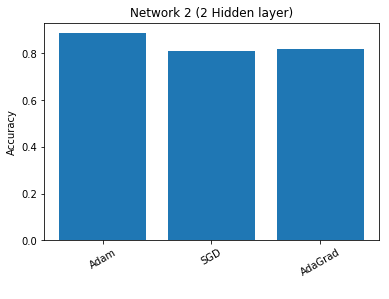

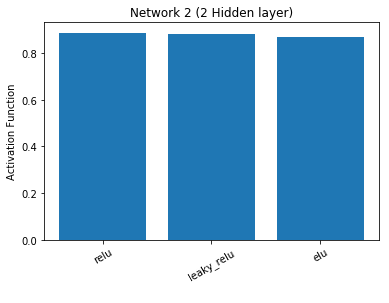

In [8]:
def plot_bar(label, values, xlabel, ylabel, title='Bar Chart'):
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title(title)
    plt.show()

optimizers = ['Adam', 'SGD', 'AdaGrad']
accuracies = [0.887, 0.81,0.82]    #accuracy gained from Network 2 with 2 hidden layers
plot_bar(optimizers, accuracies, " ", 'Accuracy', "Network 2 (2 Hidden layer)")


optimizers = ['relu', 'leaky_relu', 'elu']
accuracies = [0.887, 0.883, 0.868]    #accuracy gained from Network 2 with 2 hidden layers
plot_bar(optimizers, accuracies, " ", 'Activation Function', "Network 2 (2 Hidden layer)")

In [95]:
#The experimental evaluation (codes) for this section has been done in the above sections.

#Ans 1: 

#We executed 3 networks with 1,2, and 3 hidden layers respectively.
#Using 1 hidden layer with 128 neurons gives us accuracy 0.876, 
#whereas 2 hidden layers with 128 and 64 neurons respectively give us accuracy 0.8886.
#However, including one more layers reduces our accuracy value to 0.882.
#Therefore, we can conclude that including more than 2 layers starts to reduce the performance. So, we picked 2 hidden layers.

#Ans 2:

#we ran our experiments using 16, 32, 64,128,256 neurons for 1 hidden layer in network 1. Using 128 and 256 neurons give us highest accuracy.
#However, using 256 neurons does't improve the accuracy much from 128 wheras it increases the number of parametes 
#and increase the possibility of overfitting. So, we used 128 neurons for hidden layer 1. For the following layers, we reduced the number of neurons.

#Ans 3: 

#From the above bar chart, we can see that "relu" and "leaky_relu" gives nearly similar performance. However, "elu" activation function 
# gives a lower performance. Therefore, for this application, we suggest to use either of "relu" or "leaky relu" as activation function.

- - -
## 5. OUTLOOK (5 pts)

Plan for the outlook of your system: This will lead to the direction of your future project:
- Did your neural network outperform other "traditional ML technique? Why/why not?
- Does your model work well for the future? If not, which model should be further investigated?
- Do you satisfy with your system? What do you think needed to improve?



In [ ]:
#Ans 1:
# Best accuracy we got is 0.8887, which is better than most of the traditional ML models such as SVC, LinearSVC, GradientBoosting 
#and Logistic Regression. This is because we added more parameters in neural network and better optimization methods. As the dataset is
# non-linear, it worked best for the neural network.

#Ans 2:
#From the COnfusion Matrices above, we can see that many "T-shirts" are being misclassified as "Shirts" and vice versa. 
#This makes sense as many t-shirts look like shirts. ANN isn't a good choice to prevent this misclassification, since they consider each pixels as features.
#However, if we use CNN, it might be able to distinguish the slight differences between shirts and t-shirts, as it scans through the full image and extracts
#important features in each layer. So, we think CNN would outperform our ANN model.

#Ans 3: Given the computation time and the quality of the dataset, I think our ANN model is quite good. However, there are still avenues to improve 
# the performance of ANN by using CNN. Although, we have the chance of overfitting with CNN (small features set), it still worth trying.


- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 3:...".
 * More on the Fashion-MNIST to be found here: https://hanxiao.github.io/2018/09/28/Fashion-MNIST-Year-In-Review/

Best of luck and have fun!